<h1>Funciones de Wigner</h1>

Dada una función de onda $\Psi(x)$, se define la función de Wigner como:

$$W(x,p) = \frac{1}{\pi\hbar} \int_{-\infty}^\infty \Psi^*(x+y)\Psi(x-y)e^{\frac{2ipy}{\hbar}}dy$$

<h2>Partícula en una caja</h2>

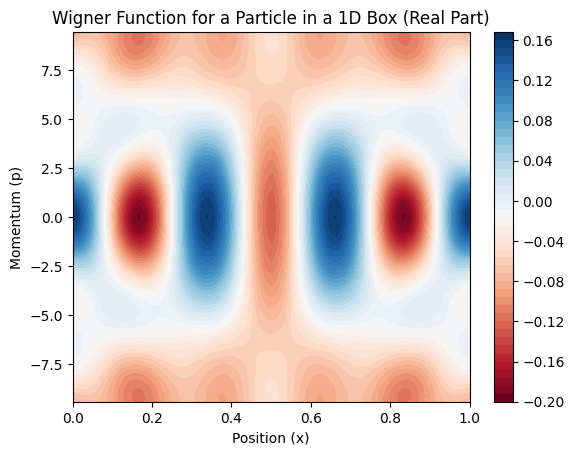

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#%matplotlib qt5
%matplotlib inline
# Define parameters
n = 3
L = 1.0  # Length of the box
hbar = 1.0  # Reduced Planck's constant

# Create a grid of x and p values
x = np.linspace(0, L, 400)
p = np.linspace(-3*np.pi/hbar, 3*np.pi/hbar, 400)
X, P = np.meshgrid(x, p)

# Initialize the Wigner function array
W = np.zeros_like(X, dtype=complex)

# Calculate the Wigner function
for i in range(len(x)):
    for j in range(len(p)):
        y = X[i, j] - x
        psi_plus = np.sqrt(2 / L) * np.sin(n * np.pi * (X[i, j] + y / 2) / L)
        psi_minus = np.sqrt(2 / L) * np.sin(n * np.pi * (X[i, j] - y / 2) / L)
        W[i, j] = (1 / (2 * np.pi * hbar)) * np.trapz(np.conj(psi_plus) * psi_minus * np.exp(-1j * P[i, j] * y / hbar), y)

# Plot the Wigner function
plt.figure()
plt.contourf(x, p, np.real(W), levels=50, cmap='RdBu')
plt.title('Wigner Function for a Particle in a 1D Box (Real Part)')
plt.xlabel('Position (x)')
plt.ylabel('Momentum (p)')
plt.colorbar()
plt.show()


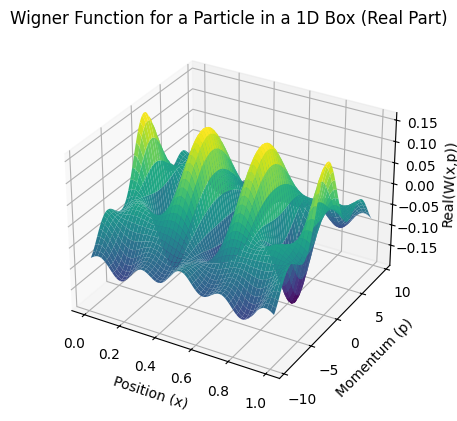

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define parameters
n = 3
L = 1.0  # Length of the box
hbar = 1.0  # Reduced Planck's constant

# Create a grid of x and p values
x = np.linspace(0, L, 400)
p = np.linspace(-3 * np.pi / hbar, 3 * np.pi / hbar, 400)
X, P = np.meshgrid(x, p)

# Initialize the Wigner function array
W = np.zeros_like(X, dtype=complex)

# Calculate the Wigner function
for i in range(len(x)):
    for j in range(len(p)):
        y = X[i, j] - x
        psi_plus = np.sqrt(2 / L) * np.sin(n * np.pi * (X[i, j] + y / 2) / L)
        psi_minus = np.sqrt(2 / L) * np.sin(n * np.pi * (X[i, j] - y / 2) / L)
        W[i, j] = (1 / (2 * np.pi * hbar)) * np.trapz(np.conj(psi_plus) * psi_minus * np.exp(-1j * P[i, j] * y / hbar), y)

# Create a 3D surface plot of the real part of the Wigner function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, P, np.real(W), cmap='viridis')

ax.set_xlabel('Position (x)')
ax.set_ylabel('Momentum (p)')
ax.set_zlabel('Real(W(x,p))')
ax.set_title('Wigner Function for a Particle in a 1D Box (Real Part)')

plt.show()


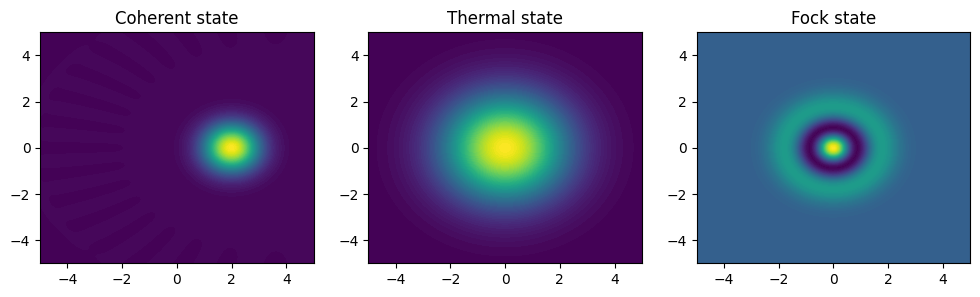

In [5]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt

N = 20

rho_coherent = coherent_dm(N, np.sqrt(2))
rho_thermal = thermal_dm(N, 2)
rho_fock = fock_dm(N, 2)
xvec = np.linspace(-5,5,200)

W_coherent = wigner(rho_coherent, xvec, xvec)
W_thermal = wigner(rho_thermal, xvec, xvec)
W_fock = wigner(rho_fock, xvec, xvec)
# plot the results

fig, axes = plt.subplots(1, 3, figsize=(12,3))
cont0 = axes[0].contourf(xvec, xvec, W_coherent, 100)
lbl0 = axes[0].set_title("Coherent state")
cont1 = axes[1].contourf(xvec, xvec, W_thermal, 100)
lbl1 = axes[1].set_title("Thermal state")
cont0 = axes[2].contourf(xvec, xvec, W_fock, 100)
lbl2 = axes[2].set_title("Fock state")
plt.show()